In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

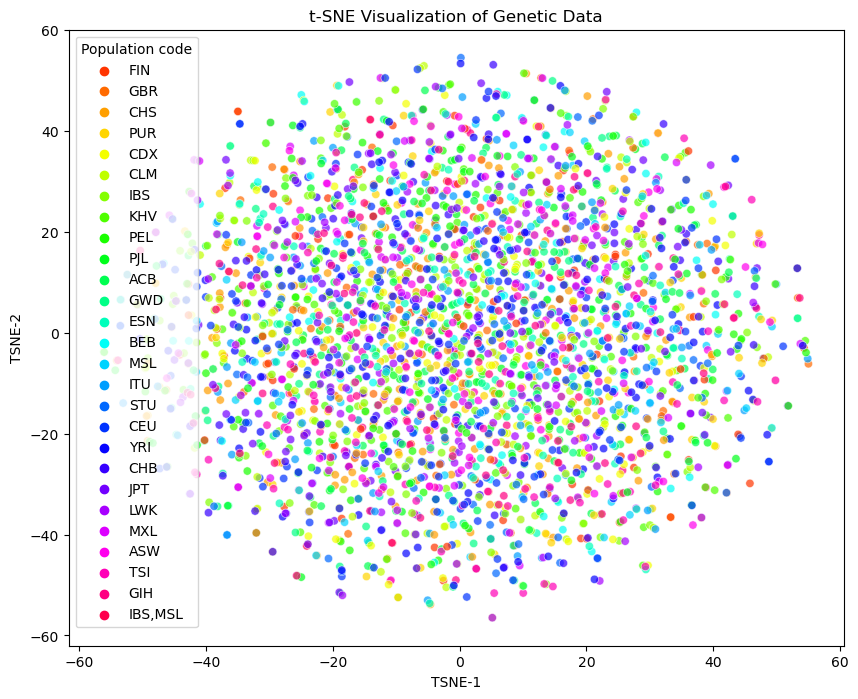

In [2]:
# Load the dataset
file_path = 'igsr-1000 genomes phase 3 release.tsv.tsv'
data = pd.read_csv(file_path, sep='\t')

np.random.seed(42)
genetic_data = np.random.rand(data.shape[0], 50)  # Assuming 50 genetic features for each sample

# Standardize the genetic data (important for t-SNE)
scaler = StandardScaler()
genetic_data_scaled = scaler.fit_transform(genetic_data)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(genetic_data_scaled)

# Add t-SNE results to the original dataframe
data['TSNE-1'] = tsne_results[:, 0]
data['TSNE-2'] = tsne_results[:, 1]

# Visualize the t-SNE result
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE-1', y='TSNE-2',
    hue='Population code',  # or 'Superpopulation code' or any categorical variable
    palette=sns.color_palette("hsv", len(data['Population code'].unique())),
    data=data,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE Visualization of Genetic Data')
plt.show()